$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
# Single systems

This notebook introduces the basic framework of *quantum information*, including the description of quantum states as vectors with complex number entries, measurements that allow classical information to be extracted from quantum states, and operations on quantum states that are described by unitary matrices.


---
## 1. Classical information

To describe quantum information we will begin with an overview of *classical* information. 


### 1.1 Classical states and probability vectors

Suppose that we have a *system* that stores information. And let's assume that this system can be in one of a finite number of *classical states* at each instant. The simplest example which is at the foundation of information theory, is that of a *bit*, which is a system of classical states 0 and 1.

Let us give the name $X$ to the system being considered, and let us denote $\Sigma$ as the set of classical states of $X$. As well as the assumption that $\Sigma$ is finite, we also have to assume that $\Sigma$ is nonempty: it makes no sense for a system to have no states at all.

For example, if $X$ is a bit, then $\Sigma = \{0, 1\}$, or if $X$ is a regular die, then $\Sigma = \{1, 2, 3, 4, 5, 6\}$.

Often in information processing, the knowledge of $X$ is uncertain. We represent our knowledge of the classical state of $X$ by assigning probabilities to each classical state, resulting in a *probabilistic state*.

For example, again assume $X$ is a bit. Based on what has happened preivously, we might believe that $X$ is in the classical state 0 three out of four times, and subsequently in the classical state 1 one out of four times. We can represent this belief by writing:
$$Pr(X = 0) = \frac{3}{4} \text{   and   } Pr(X = 1) = \frac{1}{4}.$$

But a more efficient way of representing this probabilistic state is by a column vector:
$$\begin{pmatrix}\frac{3}{4}\\\frac{1}{4}\end{pmatrix}$$

We can represent any probabilistic state through a column vector statisfying two main properties:

1. All entries of the vector are *nonnegative real numbers*.
2. The sum of the entires is equal to 1.


### 1.2 Measuring probabilistic states

Now we have to consider what happens if we were to *measure* a system when it is in a probabilistic state. By measuring a system, we mean that we look at the system and unambigiously recognize the classical state it is in. Intuitively, we can never "see" a system in a probabilistic state; a measurement yields exactly one of the allowed classical states.

Measurements change our knowledge of a system, and therefore changes the probabilistic state that we associate with that system: if we recognize that $X$ is in the classical state $\alpha \in \Sigma$, then the new probability vector representing our knowledge of $X$ becomes a vector having a $1$ in the entry corresponding to $\alpha$ and $0$ for all other entries. This vector indicates that $X$ is in the classical state $\alpha$ with certainty, which we know, since we just measured and recognized it.

We denote the vector having a $1$ in the entry corresponding to $\alpha$ and $0$ for all other entries by $\ket{\alpha}$ which is called "ket $\alpha$", vectors like these are also called *standard basis vectors*.

For example, if the system in question is a bit, the standard basis vectors are given by
$$\ket{0} = \begin{pmatrix}1\\0\end{pmatrix} \text{  and  } \ket{1} = \begin{pmatrix}0\\1\end{pmatrix}$$

Remember that any two-dimensional column vector can be represented as a linear combination of these two vectors. For example
$$\begin{pmatrix}\frac{3}{4}\\\frac{1}{4}\end{pmatrix} = \frac{3}{4}\ket{0} + \frac{1}{4}\ket{1}.$$

This fact naturally generalizes to any classical state: any column vector is a linear combination over the classical states. Returning to the change of a probabilistic state uopn being measured. Suppose that we flip a fair coin, but cover up the coin before looking at it. We could then say that its probabilistic state is
$$\begin{pmatrix}\frac{1}{2}\\\frac{1}{2}\end{pmatrix} = \frac{1}{2}\ket{\text{ heads}} + \frac{1}{2}\ket{\text{ tails}}.$$

Here, the classical state $\Sigma$ of our coin $X$ is $\{\text{ heads}, \text{ tails}\}$, we'll choose to order these states as heads first, tails second.
$$\ket{\text{ heads}} = \begin{pmatrix}1\\0\end{pmatrix} \text{   and   } \ket{\text{ tails}} = \begin{pmatrix}0\\1\end{pmatrix}$$

If we were to uncover the coin and look at it, we would see either one of the two classical states: heads or tails. Supposing that the result were tails, we would update our description of the probabilistic state of the coin so that it becomes $\ket{\text{ tails}}$.

One final remark concerning measurements of probabilistic states: they may describe knowledge or belief, not necessarily something actual. The state of our coin after we flip it, but before we look, is either heads or tails, and we simply do not know which until we look. Doing so does not actually change the state, but only our knowledge of it. Upon seeing that the classical state is tails, we naturally update our knowledge by assigning the vector $\ket{\text{ tails}}$ to the coin, but to someone else who did not see the coin when it was uncovered, the probabilisitc state remains unchanged.

### 1.3 Classical operations

In this last part of the summary of classical information, we will consider the sorts of operations one might perform on a classical system.


### Deterministic operations

First, there are *deterministic* operations, where each classical state $\alpha \in \Sigma$ is transformed into $f(\alpha)$ for some function $f$ of the form $f: \Sigma \to \Sigma$.

For example, if $\Sigma = \{0, 1\}$, there are four functions of this form $f_1, f_2, f_3, \text{ and } f_4$, which can be represented by tables of values as follows:

| $\alpha$ | $f_1$ | | $\alpha$ | $f_2$ | | $\alpha$ | $f_3$ | | $\alpha$ | $f_4$ |
|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|
| 0 | 0 | | 0 | 0 | | 0 | 1 | | 0 | 1 |
| 1 | 0 | | 1 | 1 | | 1 | 0 | | 1 | 1 |

The first and last of these functions are *constant*: $f_1(\alpha) = 0$ and $f_4(\alpha) = 1$, $\forall \alpha \in \Sigma$. The middle two are not constant, they are *balanced*, meaning that the two possible output values occur the same number of times as we range over the input space. The function $f_2$ is the *identity function*: $f_2(\alpha) = \alpha$, $\forall \alpha \in \Sigma$. And $f_3$ is the NOT-function, $f_3(0) = 1$ and $f_3(1) = 0$.

The actions of deterministic operations on probabilistic states can be represented by matrix-vector multiplication. More specifically, the matrix $M$ that represent a given function $f:\Sigma \to \Sigma$ is the one that satisfies
$$M\ket{\alpha} = \ket{f(\alpha)}, \forall \alpha \in \Sigma,$$
such a matrix always exists and is always unique.

For example, the matrices $M_1, ..., M_4$ corresponding to the functions $f_1, ..., f_4$ above are as follows:
$$M_1 = \begin{pmatrix}1 & 1\\0 & 0\end{pmatrix}, M_2 = \begin{pmatrix}1 & 0\\0 & 1\end{pmatrix}, M_3 = \begin{pmatrix}0 & 1\\1 & 0\end{pmatrix}, M_4 = \begin{pmatrix}0 & 0\\1 & 1\end{pmatrix}.$$

Matrices that represent deterministic operations always have exactly one $1$ in each column, and $0$ for all other entires. A convenient way to represent matrices of these and other forms makes use of an analogous notation for row vectors to the one for column vectors discussed previously. We denote by $\bra{\alpha}$ the *row* vector having a $1$ in the entry corresponding to the value $\alpha$ and $0$ for all other entires, $\forall \alpha \in \Sigma$. This vector is read as "bra $\alpha$".

For example, if $\Sigma = \{0, 1\}$, then
$$\bra{0} = \begin{pmatrix}1 & 0\end{pmatrix} \text{   and   } \bra{1} = \begin{pmatrix}0 & 1\end{pmatrix}.$$

For an arbitrary choice of classical state set $\Sigma$, viewing row vectors and column vectors as matrices and performing the matrix multiplication $\ket{\beta}\bra{\alpha}$, one obtains a square matrix having a $1$ in the entry corresponding to the pair $(\beta, \alpha)$, meaning that the row of the entry corresponds to $\beta$ and the column corresponds to $\alpha$, and $0$ for all other entries. For example,
$$\ket{0}\bra{1} = \begin{pmatrix}0 & 1\\0 & 0\end{pmatrix}.$$

Using this notation, for any function $f:\Sigma \to \Sigma$, we may express the matrix $M$ corresponding to the function $f$ as 
$$M = \sum_{\alpha \in \Sigma}\ket{f(\alpha)}\bra{\alpha}.$$

Now, if we again think about vectors as matrices, but this time consider the multiplication $\bra{\alpha}\ket{\beta}$, then we obtain a $1\times1$ matrix, which we can think about as a scalar. For the sake of tidiness, we write this product as $\braket{\alpha}{\beta}$. This product satisfies the following simple formula:
$$\braket{\alpha}{\beta} = \begin{cases}1 & \alpha=\beta\\0 & \alpha\neq\beta\end{cases}.$$

Using this observation, together with the knowledge that matrix multiplication is associative and linear, we obtain
$$M\ket{\beta} = \biggl( \sum_{\alpha \in \Sigma}\ket{f(\alpha)}\bra{\alpha}\biggr)\ket{\beta} = \sum_{\alpha \in \Sigma}\ket{f(\alpha)}\braket{\alpha}{\beta} = \ket{f(\beta)}, \forall \beta \in \Sigma,$$
which is exactly what we require of $M$.

As we also will discuss later, $\braket{\alpha}{\beta}$ may be seen as the *inner product* between the vectors $\ket{\alpha}$ and $\ket{\beta}$. The "bracket"/braket notation and terminology is due to *Paul Dirac*, and for this reason is also known as the *Dirac notation*.


### Probabilistic operations and stochastic matrices

In addition to deterministic operations, we also have *probabilistic operations*.

For example, consider an operation on a bit where, if the classical state of the bit is $0$, it is left alone, and if the classical state of the bit is $1$, it is flipped to $0$ with probability $\frac{1}{2}$. This operation is represented by the matrix
$$\begin{pmatrix}1 & \frac{1}{2}\\0 & \frac{1}{2}\end{pmatrix}.$$

For an arbitrary choice of classical state set, we can describe the set of all probabilistic operations in mathematical terms as those that are represented by *stochastic* matrices, which are matrices satisfying these two properties:

1. All entries are nonnegative real numbers.
2. The entires in every column sum to 1.

Equivalently, stochastic matrices are matrices whose columns all form probability vectors.

We can think about probabilistic operations at an intuitive level as ones where randomness might somehow be used or introduced during the operation, just like in the example above. With respect to the stochastic matrix description of a probabilistic operation, each column can be viewed as a vector representation of the probabilistic state that is generated given whatever classical state input corresponds to that column. 

We can also think about stochastic matrices as being exactly those matrices that always map probability vectors to probability vectors. That is, stochastic matrices always map probability vectors to probability vectors, and any matrix that always maps probability vectors to probability vectors must be a stochastic matrix.

Finally, another way to think about probabilistic operations are that they are random choices of deterministic operations. For instance, we can think about the operation in the example above as applying either the identity function of the constant $0$ function, each with probability $\frac{1}{2}$. This is consistent with the equation
$$\begin{pmatrix}1 & \frac{1}{2}\\0 & \frac{1}{2}\end{pmatrix} = \frac{1}{2}\begin{pmatrix}1 & 0\\0 & 1\end{pmatrix} + \frac{1}{2}\begin{pmatrix}1 & 1\\0 & 0\end{pmatrix}.$$


### Compositions of probabilistic operations

Suppose that $X$ is a system having a classical state $\Sigma$, and $M_1, ..., M_n$ are stochastic matrices representing probabilistic operations on the system $X$.

If the first operation $M_1$ is applied to the probabilistic state represented by a probability vector $u$, the resulting probabilistic state is represented by the vector $M_1u$. If we then apply the second probabilistic operation $M_2$ to the new probability vector, we obtain the probability vector
$$M_2(M_1u) = (M_2M_1)u.$$

The equality follows from the fact that matrix multiplication is an *associative* operation. Thus, the probabilistic operation obtained by *composing* the first and second probabilistic operations, where we first apply $M_1$ and then apply $M_2$, is represented by the matrix $M_2M_1$, which also is stochastic.

Note that the ordering is important here: although matrix multiplication is associative, it is not a *commutative* operation in general. For example, if we have
$$M_1 = \begin{pmatrix}1 & 1\\0 & 0\end{pmatrix} \text{   and   } M_2 = \begin{pmatrix}0 & 1\\1 & 0\end{pmatrix}$$
then
$$M_2M_1 = \begin{pmatrix}0 & 0\\1 & 1\end{pmatrix} \text{   and   } M_1M_2 = \begin{pmatrix}1 & 1\\0 & 0\end{pmatrix}.$$

That is, the order in which probabilistic operations are composed matters: changing the order in which operations are applied in a composition can change the resulting operation.


---
## 2. Quantum information

Now we move on to quantum information, where we make a different choice for the type of vector that represents a state - in this case a *quantum state* - of the system being considered.


### 2.1 Quantum state vectors

A *quantum state* of a system is represented by a column vector, similar to probabilistic states. As before, the indices of the vector label the classical states of the system. Vectors representing quantum states are characterized by the following two properties:

1. The entries of the quantum state vector are *complex numbers*.
2. The sum of the *absolute values squared* of the entries of a quantum state vector must equal $1$.

This, vectors representing quantum states need not have nonnegative real number entries, and it is the sum of the absolute values squared of the entries that must equal $1$. Simple as these changes are, they give rise to all the differences between quantum and classical information.

The *Euclidean norm* of a column vector
$$v = \begin{pmatrix}\alpha_1\\\vdots\\\alpha_n\end{pmatrix}$$
is denoted and defined as follows:
$$||v|| = \sqrt{\sum_{k=1}^n|\alpha_k|^2}.$$

The condition that the sum of the absolute values squared of a quantum state vector equals $1$ is therefore equivalent to that vector having Euclidean norm equal to $1$. That is, quantum state vectors are *unit vectors* with respect to the Euclidean norm.


### Examples of qubit states

The term *qubit* refers to a quantum system whose classical state set is $\Sigma = \{0, 1\}$. These are examples of quantum states of a qubit:
$$\begin{pmatrix}1\\0\end{pmatrix}=\ket{0} \text{   and   } \begin{pmatrix}0\\1\end{pmatrix} = \ket{1},$$
$$\begin{pmatrix}\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{pmatrix} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{1},$$
and
$$\begin{pmatrix}\frac{1 + 2i}{3}\\-\frac{2}{\sqrt{3}}\end{pmatrix} = \frac{1 + 2i}{\sqrt{3}}\ket{0} - \frac{2}{\sqrt{3}}\ket{1}.$$

Similar to the classical setting, we associate the quantum state vectors $\ket{0}$ and $\ket{1}$ with a qubit being in the classical state $0$ or $1$, respectively, with certainty.

For the last two examples, we have complex number entires, computing the sum of the absolute value squared of the entires yields
$$|\frac{1}{\sqrt{2}}|^2 + |\frac{1}{\sqrt{2}}|^2 = \frac{1}{2} + \frac{1}{2} = 1$$
and
$$|\frac{1 + 2i}{3}|^2 + |-\frac{2}{3}|^2 = \frac{(1 + 2i)(1 - 2i)}{9} + \frac{4}{9} = \frac{5}{9} + \frac{4}{9} = 1.$$

These are therefore valid quantum state vectors. Note that they are linear combinations of the states $\ket{0}$ and $\ket{1}$. We often say that these states are *superpositions* of the $0$ and $1$ states. Within the context of quantum systems, "superposition" and "linear combination" are essentially synonymous.

It is quite common to use notation such as $\ket{\psi}$ whose indices correspond to some classical state set $\Sigma$, and if $\alpha \in \Sigma$ is an element of this classical set, then the (matrix) product $\braket{\alpha}{\psi}$ is equal to the entry of the vector $\ket{psi}$ whose index corresponds to the value $\alpha$.

For example, if $\Sigma = \{0, 1\}$ and
$$\ket{\psi} = \frac{1 + 2i}{3}\ket{0} - \frac{2}{3}\ket{1} = \begin{pmatrix}\frac{1 + 2i}{3}\\-\frac{2}{3}\end{pmatrix},$$
then
$$\braket{0}{\psi} = \frac{1 + 2i}{3} \text{   and   } \braket{1}{\psi} = -\frac{2}{3}.$$

It must be understood when using this notation that $\bra{\psi}$ refers to the row vector obtained when taking the *conjugate-transpose* of the column vector $\ket{\psi}$, where (in addition to transposing the vector from a column vector to a row vector) each entry is replaced by its complex conjugate.

For example, if $\ket{\psi}$ is the vector defined above, then
$$\bra{\psi} = \frac{1 - 2i}{3}\bra{0} - \frac{2}{3}\bra{1} = \begin{pmatrix}\frac{1 - 2i}{3} & -\frac{2}{3}\end{pmatrix}.$$


### Quantum states of other systems

We can consider quantum states of systems having arbitrary classical state sets.

For example, here is a quantum state vector for an electrical fan switch:
$$\begin{pmatrix}\frac{1}{2}\\0\\-\frac{i}{2}\\\frac{1}{\sqrt{2}}\end{pmatrix} = \frac{1}{2}\ket{\text{ high }} -\frac{i}{2}\ket{\text{ low }} + \frac{1}{\sqrt{2}}\ket{\text{ off }}$$

The assumption here is that the classical states are ordered as *high*, *medium*, *low*, *off*. There may be no particular reason why one would want to consider a quantum state of an electrical switch, but it is possible in principle.

Here is another example, this time a quantum decimal digit whose classical states are $\Sigma = \{0, 1, ..., 9\}$:
$$\frac{1}{\sqrt{385}}\begin{pmatrix}1\\2\\3\\4\\5\\6\\7\\8\\9\\10\end{pmatrix} = \frac{1}{\sqrt{385}}\sum_{k=0}^9(k+1)\ket{k}.$$

This example illustrates the convenience of writing state vectors using the Dirac notation. For this particular example, the column vector representation is merely cumbersome - but if there were significantly more classical states it would become unusable. The Dirac notation, in contrast, supports precise descriptions of large and complicated vectors in compact form. 

The Dirac notation allows for the expression of vectors where different aspects of the vectors are *indeterminate*. For example, for an arbitrary classical state set $\Sigma$, we can consider the quantum state vector
$$\frac{1}{\sqrt{|\Sigma|}}\sum_{\alpha \in \Sigma} \ket{\alpha},$$

which is a uniform superposition over the classical states in $\Sigma$.


### 2.2 Measuring quantum states

Next let us consider what happens when a quantum state is *measured*, focusing on a simple type of measurement known as a *standard basis measurement*.

Similar to the probabilistic setting, when a system in a quantum state is measured, the observer performing the measurement won't see a quantum state vector, but rather some classical state. In this sense, measurements act as the interface between quantum and classical information, through which classical information is extracted from quantum states.

The rule is as follows: if a quantum state is measured, each classical state of the system results with probability equal to the absolute value squared of the entry in the quantum state vector corresponding to that classical state. This is known as the *Born rule* in quantum mechanics.

For example, measuring the plus state
$$\ket{ +} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{1}$$
results in the two possible outcomes, $0$ and $1$, with probabilities as follows.
$$Pr(\text{result is }0) = |\braket{0}{+}|^2 = |\frac{1}{\sqrt{2}}|^2 = \frac{1}{2}$$
$$Pr(\text{result is }1) = |\braket{1}{+}|^2 = |\frac{1}{\sqrt{2}}|^2 = \frac{1}{2}$$


### 2.3 Unitary operations

Thus far, it may not be evident why quantum information is fundamentally different from classical information. That is, when a quantum state is measured, the probability to obtain each classical state is given by the absolute value squared of the corresponding vector entry - so why not simply record these probabilities in a probability vector?

The answer, at least in part, is that the set of allowable *operations* that can be performed on a quantum state is different than it is for classical information. Similar to the probabilistic setting, operation on quantum states are linear mappings - but rather than being represented by stochastic matrices as in the classical case, operations on quantum state vectors are represented by *unitary* matrices.

A square matrix $U$ having complex number entries is unitary if it satisfies the equations
$$UU^† = \mathbb{1}$$
$$U^†U = \mathbb{1}.$$

Here, $\mathbb{1}$ is the identity matrix, and $U^†$ is the *conjugate transpose* of $U$. If either of the equalities in the equation above is true, then the other must also be true; both equalities are equivalent to $U^†$ being the inverse of $U$:
$$U^{-1} = U^†.$$

The condition that $U$ is unitary is equivalent to the condition that multiplication by $U$ does not change the Euclidean norm of any vector. That is, an $n\times n$ matrix $U$ is unitary if and only if $||U\ket{\psi}||=||\ket{\psi}||$ for every $n$-dimensional column vector $\ket{\psi}$ with complex number entries. Thus, because the set of all quantum state vectors is the same as the set of vectors having Euclidean norm equals to $1$, multiplying a unitary matrix to a quantum state vector results in another quantum state vector.

Indeed, unitary matrices are exactly the set of linear mappings which transform quantum state vectors to other quantum state vectors. Notice the resemblance to the classical probabilistic case, where operations are associated with stochastic matrices, which are the ones that always transform probability vectors into probability vectors.


### Important examples of unitary operations on qubits

1. *Pauli operations*. The four Pali operations are as follows:
$$\mathbb{1} = \begin{pmatrix}1 & 0\\0 & 1\end{pmatrix}, \sigma_x = \begin{pmatrix}0 & 1\\1 & 0\end{pmatrix}, \sigma_y = \begin{pmatrix}0 & -i\\i & 0\end{pmatrix}, \sigma_z = \begin{pmatrix}1 & 0\\0 & -1\end{pmatrix}.$$
A common notation that we will often use, is $X = \sigma_x, Y = \sigma_y,$ and $Z = \sigma_z$ - but be aware that the letters $X, Y,$ and $Z$ are also commonly used for other purposes.

2. *Hadamard operation*. The Hadamard operation is described by the following matrix:
$$H_m = \frac{1}{\sqrt{2}}\begin{pmatrix}H_{m-1} & H_{m-1}\\H_{m-1} & -H_{m-1}\end{pmatrix}, \\H_0 = 1.$$

3. *Phase operations*. A phase operation is one described by the matrix
$$P_\theta = \begin{pmatrix}1 & 0\\0 & e^{i\theta}\end{pmatrix}$$
for any choice of real number $\theta$. The operations
$$S = P_{\pi/2} = \begin{pmatrix}1 & 0\\0 & i\end{pmatrix} \text{   and   } T = P_{\pi/4} = \begin{pmatrix}1 & 0\\0 & \frac{1 + i}{\sqrt{2}}\end{pmatrix}$$
are particulary important examples. Other examples include $\mathbb{1} = P_0$ and $\sigma_z = P_\pi$.

Below is the action of the Hadamard operation on a few qubit state vectors.
$$H\ket{0} = \begin{pmatrix}\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{pmatrix} = \ket{ +},$$
$$H\ket{1} = \begin{pmatrix}\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}}\\-\frac{1}{\sqrt{2}}\end{pmatrix} = \ket{ -}.$$

It is worth pausing to consider the fact that $H\ket{+}=\ket{0}$ and $H\ket{-}=\ket{1}$. Consider a situation in which a qubit is prepared in one of the two quantum states $\ket{+}$ and $\ket{-}$, but where it is not known to us which one it is. Measuring either state produces the same output distribution as the other: $0$ and $1$ both appear with equal probability $1/2$. So, doing this provides no information about which of the two states $\ket{+}$ and $\ket{-}$ was originally prepared. However, if we apply the Hadamard operation and then measure, we obtain the outcome $0$ with certainty if the original state was $\ket{+}$ and we obtain the outcome $1$, again with certainty, if the original state was $\ket{-1}$. Thus, quantum states $\ket{+}$ and $\ket{-}$ can be discriminated *perfectly*. This reveals that sign changes, or more generally changes to the *phases* of the complex number entries in the quantum state vector, can significantly change that state.

Here is another example, this time the action of a $T$ operation on a plus state.
$$T\ket{+} = T\biggl(\frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{1}\biggl) = \frac{1}{\sqrt{2}}T\ket{0} + \frac{1}{\sqrt{2}}T\ket{1} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1 + i}{2}\ket{1}$$
Notice here that we did not bother to convert to the equivalent matrix/vector forms, and instead used the linearity of matrix multiplication together with the formulas
$$T\ket{0} = \ket{0} \text{   and   } T\ket{1} = \frac{1 + i}{\sqrt{2}}\ket{1}.$$


### Compositions of qubit unitary operations

Compositions of unitary operations are represented by matrix multiplication, just like we had in the probabilistic setting. For example, if we first apply a Hadamard operation, followed by the operation $S$, followed by another Hadamard operation, the resulting operation (which we'll name $R$) is as follows:
$$R = HSH = \begin{pmatrix}\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\end{pmatrix}\begin{pmatrix}1 & 0\\0 & i\end{pmatrix}\begin{pmatrix}\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\end{pmatrix} = \begin{pmatrix}\frac{1 + i}{2} & \frac{1 - i}{2}\\\frac{1 - i}{2} & \frac{1 + i}{2}\end{pmatrix}.$$
This unitary operation $R$ is an interesting example. By applying this operation twice, which is equivalent to squaring its matrix representation, we obtain a NOT operation:
$$R^2 = \begin{pmatrix}\frac{1 + i}{2} & \frac{1 - i}{2}\\\frac{1 - i}{2} & \frac{1 + i}{2}\end{pmatrix}^2 = \begin{pmatrix}0 & 1\\1 & 0\end{pmatrix}.$$

That is, $R$ is a *square root of NOT* operation. Such a behaviour, where the same operation is applied twice to yield a NOT operation, is not possible for a classical operation on a single bit. This is related to the fact that you can't take the square root of a negative number and stay on the real line.


### Unitary operations on larger systems

In later lessons, we will see many examples of unitary operations on systems having more than two classical states. An example of a unitary operation on a system having three classical states is given by the following matrix. 
$$A = \begin{pmatrix}0 & 0 & 1\\1 & 0 & 0\\0 & 1 & 0\end{pmatrix}$$
Assuming that the classical states of the system are $0, 1$, and $2$, we can describe this operation as addition modulo $3$.
$$A\ket{0} = \ket{1}, A\ket{1} = \ket{2}, A\ket{2} = \ket{0}$$

The matrix $A$ is an example of a *permutation matrix*. It is a matrix in which every row and column has exactly one $1$. Such matrices only rearrange, or permute, the entries of the vector it acts on. The identity is the simplest permutation matrix; another example is the NOT operation on a bit or a qubit. Every permutation matrix, in any positive integer dimension, is unitary.

Another example of a unitary matrix, this time being a $4\times 4$ matrix, is this one:
$$U = \frac{1}{2}\begin{pmatrix}1 & 1 & 1 & 1\\1 & i & -1 & -i\\1 & -1 & 1 & -1\\1 & -i & -1 & i\end{pmatrix}.$$

This matrix describes an operation known as the *quantum Fourier transform*, specifically in the $4\times 4$ case.


---
## 3. Code examples

In this section we present some examples of Qiskit implementations of the concepts introduced in this lesson.


In [1]:
# Upgrade the Python Package Index (pip) and install required libraries.
# !pip install --upgrade pip
# !pip install numpy
# !pip install matplotlib
# !pip install qiskit

In [2]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])


# The Statevector class provides a `draw` method for displaying state vectors, including
# support for both `text` and `latex` formatting.
# The class also implements an `is_valid` method which checks to see if a given vector
# is a valid quantum state vector, i.e., it has Euclidean norm equal to 1.
display(u.draw('latex'))
display(v.draw('latex'))
display(v.draw('text'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

#### Simulating measurements using `Statevector`

Next we will see one way that measurements of quantum states can be simulated with Qiskit, using the `measure` method from the `Statevector` class.

In [3]:
result, new_state, = v.measure()
print(f'Result={result}, new quantum state={new_state}')

Result=0, new quantum state=Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
            dims=(2,))


Measurement outcomes are probabilistic, so the same method can return different results. Try running the above cell a number of times to see this happen. For the particular example of the vector $v$ defined above, the `measure` method defined the quantum state vector after the measurement takes place to either be 
$$\frac{1 + 2i}{\sqrt{5}}\ket{0}$$
or
$$-\ket{1}$$
depending on the measurement outcome. As a safety precaution, the `measure` method will throw an error if it is applied to an invalid quantum state vector.

`Statevector` also comes with a `sample_counts` method that allows for the simulation of any number of measurements on the system. For example, the following cell shows the outcome of measuring the vector $v$ $1000$ times, which (with high probability) results in outcome $0$ approximately $5$ out of every $9$ times.

{'0': 538, '1': 462}

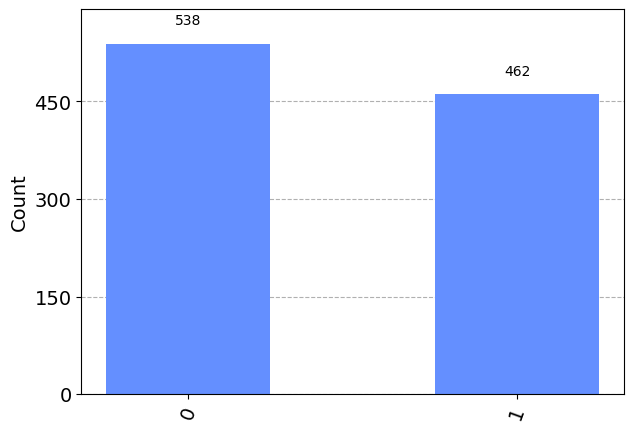

In [4]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

#### Performing operations with `Operator` and `Statevector`

Unitary operations can be defined and performed on state vectors in Qiskit using the `Operator` class, as in the following example below.


<IPython.core.display.Latex object>

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

{'0': 8546, '1': 1454}

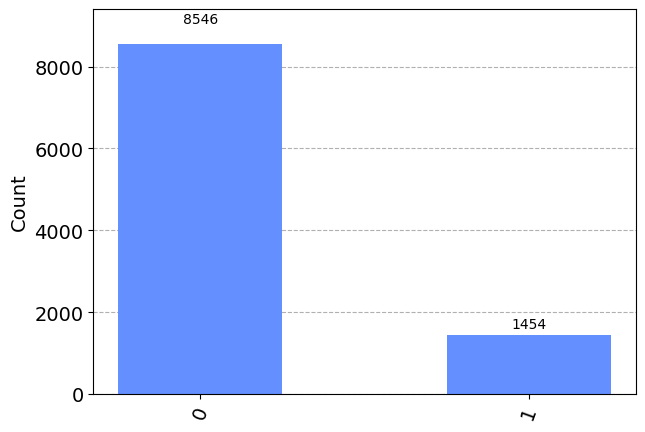

In [5]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.j], [1.j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])
S = Operator([[1, 0], [0, 1.j]])
T = Operator([[1, 0], [0, (1+1.j)/1/sqrt(2)]])

q = Statevector([1, 0])

q = q.evolve(H)
q = q.evolve(T)
q = q.evolve(H)
q = q.evolve(T)
q = q.evolve(Z)

display(q.draw('latex'))
display(q.draw('text'))

# Based on the superposition of the quantum state which we get by invoking `draw` on the
# quantum state vector, we know that approx. 85% of the measurements should result
# in a 0 value, and 1 in the rest. Lets see if this is the case...
statistics = q.sample_counts(10000)
display(statistics)
plot_histogram(statistics)

#### Looking ahead toward quantum circuits

Quantum circuits won't be formally introduced right now, but we can nevertheless experiment with composing qubit unitary operations using Qiskit's `QuantumCircuit` class. A list of all available quantum gates for the circuit can be found in on Qiskit Terra github repo, [link](https://github.com/Qiskit/qiskit-terra/blob/4b860332a69ebfa8a4b52e0ab5dd6c753db5c39e/qiskit/circuit/quantumcircuit.py#L1596).


In [6]:
from qiskit import QuantumCircuit

# We define our circuit to only operate on one single qubit.
# The operations are exactly those which we performed in the
# previous Python cell. Hadamard, T, and Z operations.
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

display(circuit.draw())

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [7]:
ket0 = Statevector([1, 0])
r = ket0.evolve(circuit)

display(r.draw('latex'))
display(r.draw('text'))


<IPython.core.display.Latex object>

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

And as we can see, we get the exact same resulting quantum state vector when applying our Operations in the circuit instead. If we simulate measurements again, we should receive approx. $85\%$ value $0$ and the rest as value $1$...

{'0': 8486, '1': 1514}

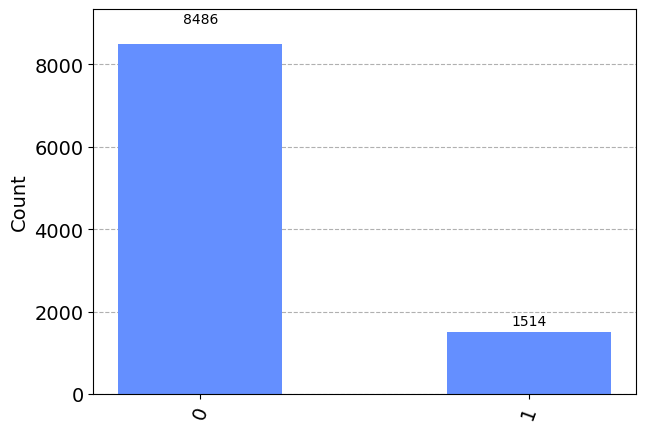

In [8]:
statistics = r.sample_counts(10000)
display(statistics)
plot_histogram(statistics)